In [14]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.13.1


In [136]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [139]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [140]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_test.shape, y_train.shape

((10000, 10), (60000, 10))

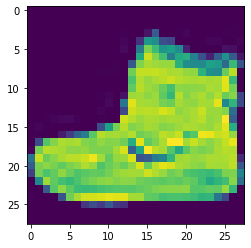

In [141]:
plt.imshow(x_train[0])

In [142]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [143]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)


In [144]:
print(x_train.shape, y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [145]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [146]:
print(x_train.shape, y_train.shape)

(48000, 28, 28, 1) (48000, 10)


In [147]:
def build_basic_model():
    model = keras.models.Sequential()
    model.add( keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1) ) )
    model.add( keras.layers.MaxPooling2D(2,2) )
    model.add( keras.layers.Conv2D( 32, (3,3), activation='relu' ) )
    model.add( keras.layers.MaxPooling2D(2,2) )
    model.add( keras.layers.Conv2D( 64, (3,3), activation='relu' ) )
    model.add( keras.layers.MaxPooling2D(2,2) )
    model.add( keras.layers.Flatten())
    model.add( keras.layers.Dense(512, activation='relu'))
    model.add( keras.layers.Dense(128, activation='relu'))
    model.add( keras.layers.Dense(10, activation='softmax'))
    
    return model

In [148]:
model = build_basic_model()

In [149]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [150]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath='model.hdf5', monitor='loss', verbose=1, save_best_only=True)]

In [151]:
model.fit(x_train, y_train, 
         batch_size=64,
         epochs=5,
         validation_data=( x_valid, y_valid ),
         callbacks=callbacks)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
47808/48000 [============================>.] - ETA: 0s - loss: 0.7073 - acc: 0.7359
Epoch 00001: loss improved from inf to 0.70640, saving model to model.hdf5
48000/48000 [==============================] - 18s 381us/sample - loss: 0.7064 - acc: 0.7362 - val_loss: 0.5003 - val_acc: 0.8206
Epoch 2/5
47872/48000 [============================>.] - ETA: 0s - loss: 0.4698 - acc: 0.8288
Epoch 00002: loss improved from 0.70640 to 0.46956, saving model to model.hdf5
48000/48000 [==============================] - 19s 399us/sample - loss: 0.4696 - acc: 0.8288 - val_loss: 0.4414 - val_acc: 0.8342
Epoch 3/5
47872/48000 [============================>.] - ETA: 0s - loss: 0.4006 - acc: 0.8515
Epoch 00003: loss improved from 0.46956 to 0.40053, saving model to model.hdf5
48000/48000 [==============================] - 29s 613us/sample - loss: 0.4005 - acc: 0.8514 - val_loss: 0.3827 - val_acc: 0.85

In [152]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8652


In [168]:
preds = model.predict(x_test)

In [171]:
def plot_pred(X_test,y_test, y_hat, ref_dict):
    figure = plt.figure(figsize=(20, 8))
    for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
        ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
        # Display each image
        ax.imshow(np.squeeze(X_test[index]))
        predict_index = np.argmax(y_hat[index])
        true_index = np.argmax(y_test[index])
        # Set the title for each image
        ax.set_title("{} ({})".format(ref_dict[predict_index], 
                                      ref_dict[true_index]),
                                      color=("green" if predict_index == true_index else "red"))

In [172]:
ref_dict = {0: "top", 1: "Trouser", 2: "Pull Over", 3: "Dress", 4: "Coat",
        5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle_Boot"}

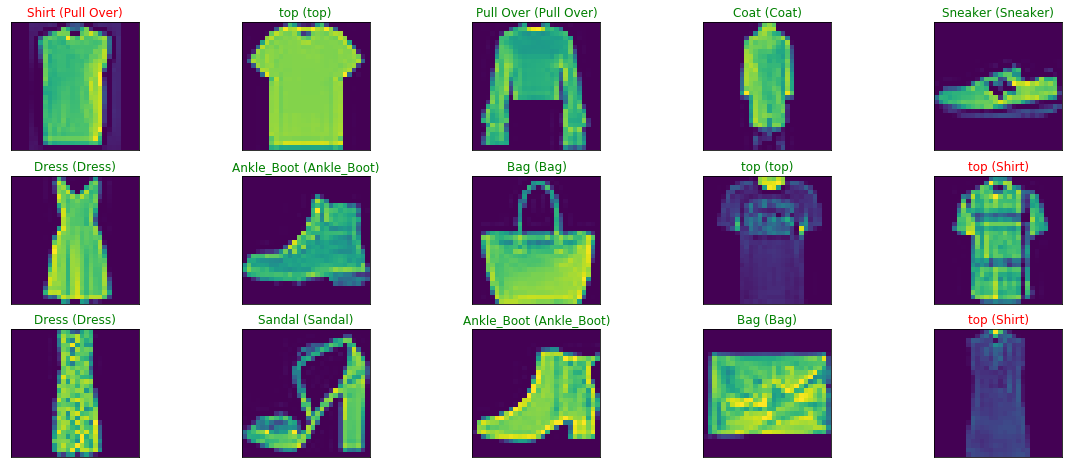

In [174]:
plot_pred(x_test, y_test, preds, ref_dict)

## Loading Model weights and do the same predictions

In [175]:
model = None

In [176]:
model = tf.keras.models.load_model('model.hdf5')

In [177]:
preds = model.predict(x_test)

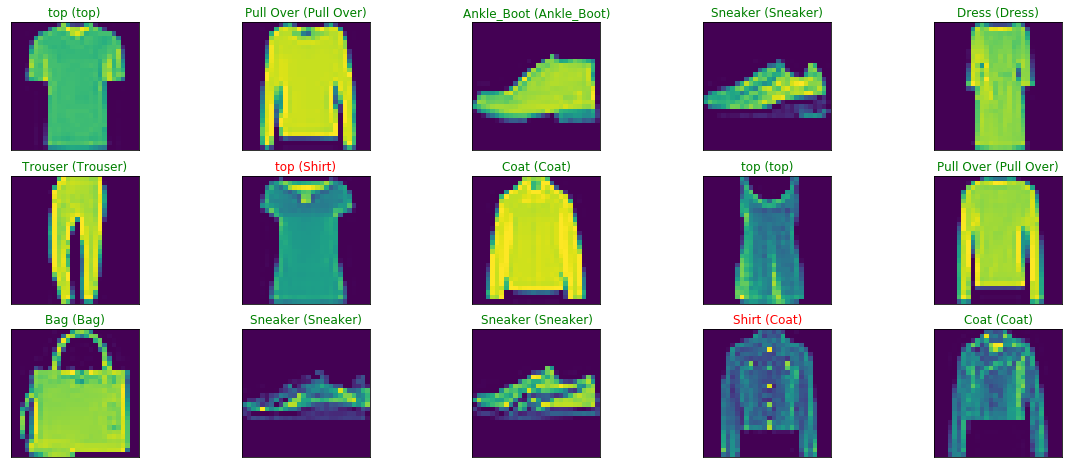

In [178]:
plot_pred(x_test, y_test, preds, ref_dict)